# Binary classification
------------------------------------

This example shows how to use ATOM to solve a binary classification problem. Additonnaly, we'll perform a variety of data cleaning steps to prepare the data for modelling.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


## Run the pipeline

In [3]:
# Call ATOM using only 5% of the complete dataset (for explanatory purposes)
atom = ATOMClassifier(X, "RainTomorrow", n_rows=0.05, warnings=False, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ====================== >>
Shape: (7109, 22)
Scaled: False
Missing values: 15667 (10.0%)
Categorical features: 5 (23.8%)
Duplicate samples: 1 (0.0%)
---------------------------------------
Train set size: 5688
Test set size: 1421
---------------------------------------
|    | dataset    | train      | test       |
|---:|:-----------|:-----------|:-----------|
|  0 | 5569 (3.6) | 4449 (3.6) | 1120 (3.7) |
|  1 | 1540 (1.0) | 1239 (1.0) | 301 (1.0)  |



In [4]:
# Encode the target column
atom.clean()

Applying data cleaning...


In [5]:
# Impute missing values
atom.impute(strat_num="median", strat_cat="drop", max_nan_rows=0.8)

Fitting Imputer...
Imputing missing values...
 --> Dropping 746 samples for containing more than 16 missing values.
 --> Imputing 6 missing values with median (12.2) in feature MinTemp.
 --> Imputing 1 missing values with median (23.0) in feature MaxTemp.
 --> Imputing 27 missing values with median (0.0) in feature Rainfall.
 --> Imputing 2271 missing values with median (4.8) in feature Evaporation.
 --> Imputing 2611 missing values with median (8.6) in feature Sunshine.
 --> Dropping 236 samples due to missing values in feature WindGustDir.
 --> Dropping 302 samples due to missing values in feature WindDir9am.
 --> Dropping 23 samples due to missing values in feature WindDir3pm.
 --> Imputing 36 missing values with median (69.0) in feature Humidity9am.
 --> Imputing 65 missing values with median (51.0) in feature Humidity3pm.
 --> Imputing 45 missing values with median (1017.5) in feature Pressure9am.
 --> Imputing 40 missing values with median (1015.2) in feature Pressure3pm.
 --> Im

In [6]:
# Encode the categorical features
atom.encode(strategy="Target", max_onehot=10, frac_to_other=0.04)

Fitting Encoder...
Encoding categorical columns...
 --> Target-encoding feature Location. Contains 1 classes.
 --> Target-encoding feature WindGustDir. Contains 16 classes.
 --> Target-encoding feature WindDir9am. Contains 16 classes.
 --> Target-encoding feature WindDir3pm. Contains 16 classes.
 --> Ordinal-encoding feature RainToday. Contains 2 classes.


In [7]:
# Train an Extra-Trees and a Random Forest model
atom.run(models=["ET", "RF"], metric="f1", n_bootstrap=5)


Training ===================================== >>
Models: ET, RF
Metric: f1


Results for Extra-Trees:         
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.584
Time elapsed: 0.456s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.5907 ± 0.0105
Time elapsed: 1.762s
-------------------------------------------------
Total time: 2.219s


Results for Random Forest:         
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.6269
Time elapsed: 0.789s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.5999 ± 0.0081
Time elapsed: 3.597s
-------------------------------------------------
Total time: 4.386s


Final results ========================= >>
Duration: 6.606s
------------------------------------------
Extra-Trees   --> f1: 0.5907 ± 0.0105 ~
Random Forest --> f1: 0.5999 ± 0.0081 ~ !


## Analyze the results

In [8]:
# Let's have a look at the final results
atom.results

,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
ET,1.0,0.583979,0.456s,0.590740,0.010521,1.762s,2.219s
RF,1.0,0.626866,0.789s,0.599887,0.008121,3.597s,4.386s


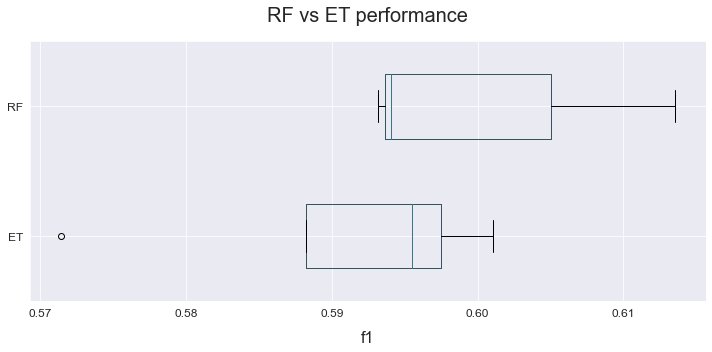

In [9]:
# Visualize the bootstrap results
atom.plot_results(title="RF vs ET performance")

In [10]:
# Print the results of some common metrics
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
ET,0.859266,0.716994,0.716167,0.583979,0.412409,0.528361,0.773973,0.468880,0.879843
RF,0.868881,0.727407,0.742031,0.626866,0.456522,0.567628,0.782609,0.522822,0.878708


In [11]:
# The winner attribute calls the best model (atom.winner == atom.rf)
print(f"The winner is the {atom.winner.fullname} model!!")

The winner is the Random Forest model!!


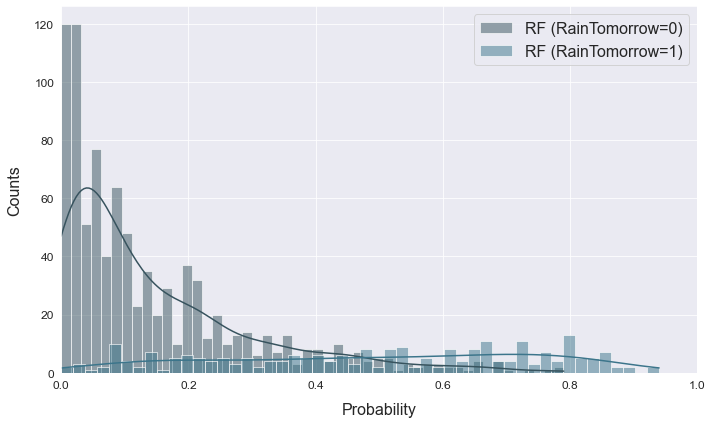

In [12]:
# Visualize the distribution of predicted probabilities
atom.winner.plot_probabilities()

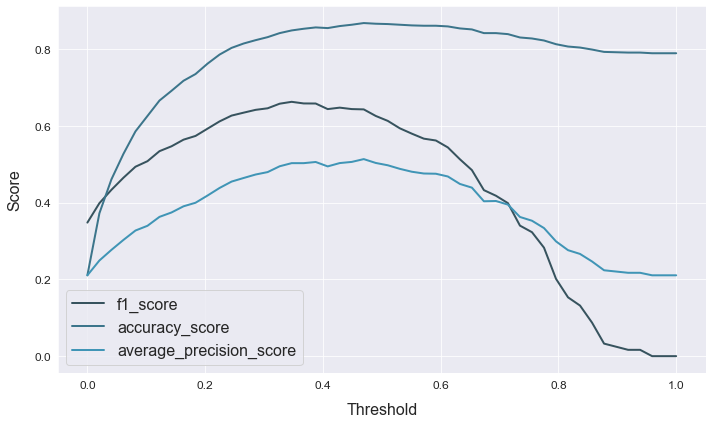

In [13]:
# Compare how different metrics perform for different thresholds
atom.winner.plot_threshold(metric=["f1", "accuracy", "average_precision"], steps=50)